rays aperture 0.0
rays aperture 0.21838284
rays aperture 0.22628403


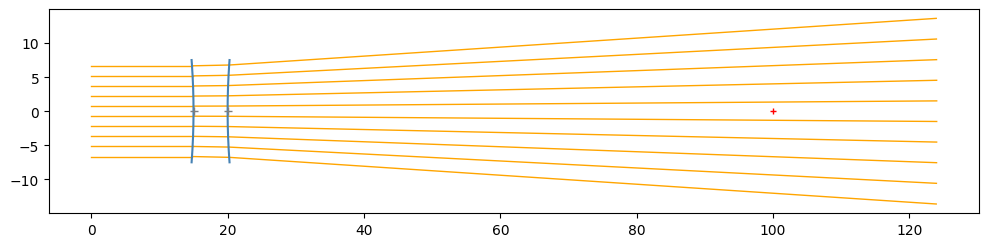

[  0/150] L= 58.763 | grad norm= 10578.0341796875
[  8/150] L=  5.853 | grad norm= 3272.53515625
[ 16/150] L=  1.398 | grad norm= 1595.692138671875


[ 24/150] L=  3.093 | grad norm= 2374.611572265625
[ 32/150] L=  0.203 | grad norm= 608.0393676757812
[ 40/150] L=  0.337 | grad norm= 783.2066650390625


[ 48/150] L=  0.206 | grad norm= 612.9661254882812
[ 56/150] L=  0.010 | grad norm= 136.9151611328125
[ 64/150] L=  0.055 | grad norm= 315.0479431152344


[ 72/150] L=  0.000 | grad norm= 8.742738723754883
[ 80/150] L=  0.011 | grad norm= 138.6728515625
[ 88/150] L=  0.000 | grad norm= 18.53325653076172


[ 96/150] L=  0.002 | grad norm= 60.15985107421875
[104/150] L=  0.000 | grad norm= 8.390710830688477
[112/150] L=  0.000 | grad norm= 26.728816986083984


[120/150] L=  0.000 | grad norm= 1.362544059753418
[128/150] L=  0.000 | grad norm= 11.840846061706543
[136/150] L=  0.000 | grad norm= 1.3905220031738281


[144/150] L=  0.000 | grad norm= 4.866866111755371


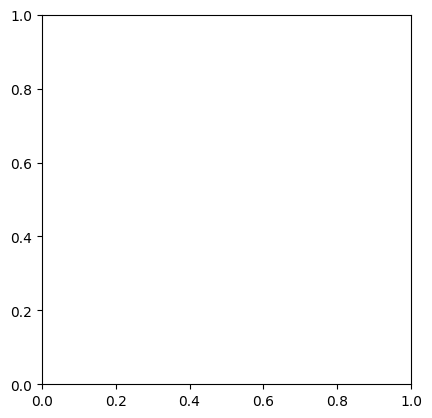

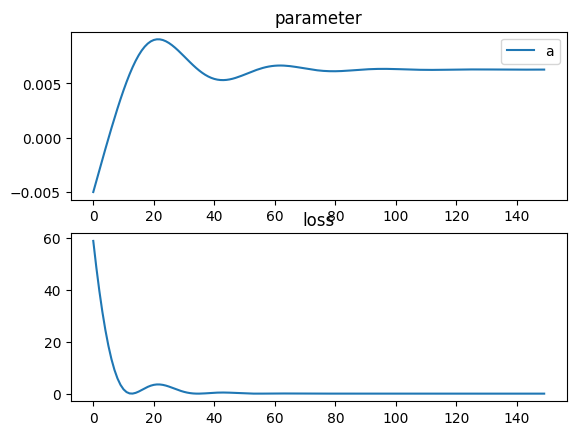

rays aperture 0.0
rays aperture 0.2741356
rays aperture 0.2641678


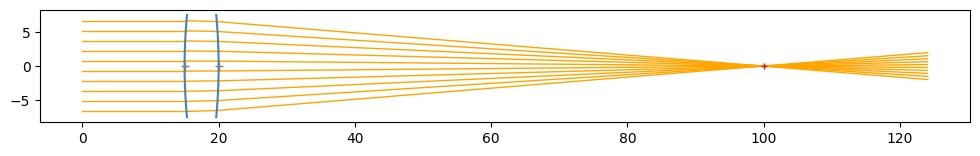

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm


# Example without using tlm.Module

lens_width = 15.0

shape = tlm.Parabola(lens_width, a=nn.Parameter(torch.tensor(-0.005)))

optics = tlm.OpticalSequence(
    tlm.PointSourceAtInfinity(beam_diameter=0.9*lens_width),
    tlm.Gap(15.),
    
    tlm.RefractiveSurface(shape, (1.0, 1.49)),
    tlm.Gap(5.),
    tlm.RefractiveSurface(shape, (1.49, 1.0), scale=-1),
    
    tlm.Gap(80.0),
    tlm.FocalPoint(),
)

# Manually register parameters because we're not using tlm.Module
for n, p in shape.parameters().items():
    optics.register_parameter(n, p)

tlm.render_plt(optics)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-3),
    sampling = {"rays": 10},
    num_iter = 150
)

tlm.render_plt(optics)